# Seed random dots on an SHP file

In this notebook we read an SHP file of the Campfire wildfire perimeter and we seed a number of points with a random location inside the SHP area

We first load useful libraries

In [2]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


We now read the SHP file as a geopandas

In [3]:
reader = r'../../DATA/Fire_Perimeter.shp' 
gdf_polygons = gpd.read_file(reader)

The polygon containing the fire perimeter is now stored as a geopandas

In [7]:
gdf_polygons

,id,geometry
0,None,"POLYGON ((-121.77337 39.72297, -121.77418 39.7..."


We define the boundaries where the random dots will be seed

In [9]:
x_min, y_min, x_max, y_max = gdf_polygons.total_bounds
gdf_polygons.total_bounds

array([-121.77762215,   39.60192347, -121.42648978,   39.85986267])

We set the number of points to be seed

In [11]:
n = 20

We assign coordinates to these points

In [12]:
x = np.random.uniform(x_min, x_max, n)
y = np.random.uniform(y_min, y_max, n)

We create a geopandas dataframe with the pairs of x and y

In [13]:
gdf_points = gpd.GeoSeries(gpd.points_from_xy(x, y))
gdf_points

0     POINT (-121.43276 39.60611)
1     POINT (-121.56627 39.74749)
2     POINT (-121.68428 39.82557)
3     POINT (-121.55566 39.82890)
4     POINT (-121.74641 39.61310)
5     POINT (-121.52073 39.83708)
6     POINT (-121.65871 39.65508)
7     POINT (-121.70094 39.76059)
8     POINT (-121.74242 39.66537)
9     POINT (-121.43185 39.84982)
10    POINT (-121.73475 39.61077)
11    POINT (-121.58456 39.64817)
12    POINT (-121.57007 39.66687)
13    POINT (-121.55871 39.73622)
14    POINT (-121.77520 39.68828)
15    POINT (-121.51728 39.64356)
16    POINT (-121.76197 39.78443)
17    POINT (-121.64941 39.80657)
18    POINT (-121.66526 39.78723)
19    POINT (-121.75386 39.75774)
dtype: geometry

We check whether these points belong to the fire perimeter

In [15]:
gdf_points = gdf_points[gdf_points.within(gdf_polygons.unary_union)]
gdf_points

1     POINT (-121.56627 39.74749)
3     POINT (-121.55566 39.82890)
5     POINT (-121.52073 39.83708)
6     POINT (-121.65871 39.65508)
7     POINT (-121.70094 39.76059)
8     POINT (-121.74242 39.66537)
13    POINT (-121.55871 39.73622)
dtype: geometry

Once we have the dots we plot both the perimeter and the location of the dots. 

<AxesSubplot:>

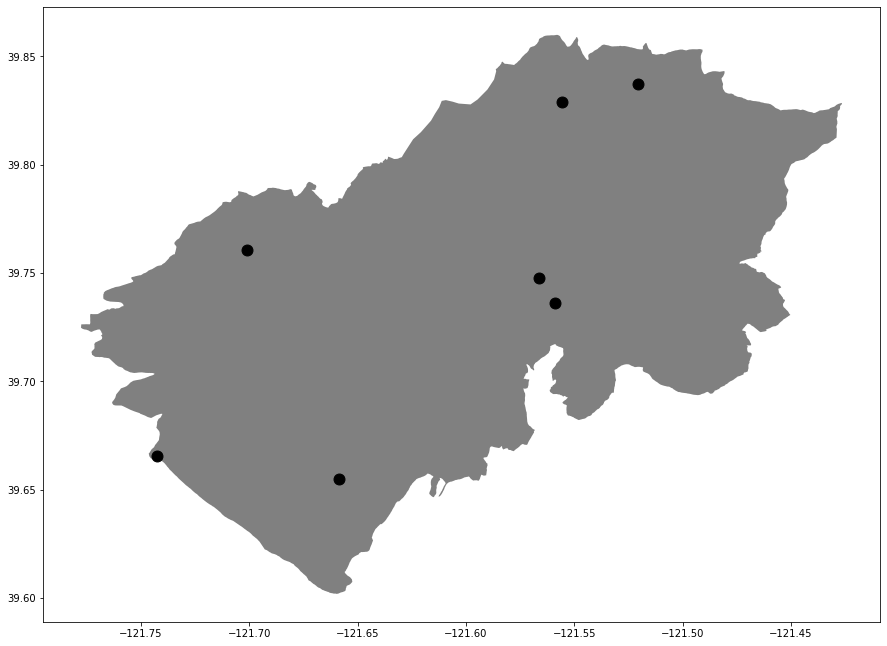

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf_polygons.plot(ax=ax, color='grey')
gdf_points.plot(ax=ax,color='k', markersize=120)